In [69]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [70]:
with h5py.File("Data/Mid_Level_Linear_Dataset_Data_For_Correlation.h5", "r") as hf:
    preds = hf["train"][:]  # (N, 7)
    labels = hf["label"][:] # (N, 9)

In [71]:
labels.dtype

dtype('float32')

In [72]:
preds.dtype

dtype('float32')

In [73]:
features = ["Melodiousness","Articulation","Rhythmic Complexity","Rhythmic Stability",
            "Dissonance","Tonal Stability","Modality (Minor-ness)"]
# emotions = ["Amazement","Solemnity","Tenderness","Nostalgia","Calmness",
#             "Power","Joy","Tension","Sadness"]
emotions = ["Wonder","Transcendence","Tenderness","Nostalgia","Peacefulness",
            "Power","Joyful Activation","Tension","Sadness"]


In [74]:
df_preds = pd.DataFrame(preds, columns=features)
df_labels = pd.DataFrame(labels, columns=emotions)

In [75]:
# Correlation matrix (7x9)
correlation_matrix = pd.DataFrame(index=features, columns=emotions)

for feat in features:
    for emo in emotions:
        corr, _ = pearsonr(df_preds[feat], df_labels[emo])
        correlation_matrix.at[feat, emo] = corr

correlation_matrix = correlation_matrix.astype(float)

In [76]:
correlation_matrix

,Wonder,Transcendence,Tenderness,Nostalgia,Peacefulness,Power,Joyful Activation,Tension,Sadness
Melodiousness,-0.093169,-0.080546,0.274417,0.237223,0.145685,-0.279913,-0.307204,-0.245067,0.190736
Articulation,0.079971,-0.009003,-0.146630,-0.191299,-0.225575,0.280863,0.333039,0.212392,-0.132093
Rhythmic Complexity,0.086171,-0.025725,-0.092756,0.008514,-0.050050,0.016659,0.001203,0.078596,0.068436
Rhythmic Stability,0.068217,-0.065747,0.004049,0.015554,-0.083611,0.036905,0.191903,0.027840,-0.120083
Dissonance,0.014971,0.199149,-0.105463,-0.131014,0.008423,0.100986,0.170314,0.162578,-0.053452
Tonal Stability,-0.096792,-0.075661,0.139952,0.148299,0.107932,-0.212549,-0.206374,-0.263103,0.058500
Modality (Minor-ness),-0.072633,0.210043,-0.113349,-0.136911,0.028657,-0.032967,-0.164268,0.112233,0.089761


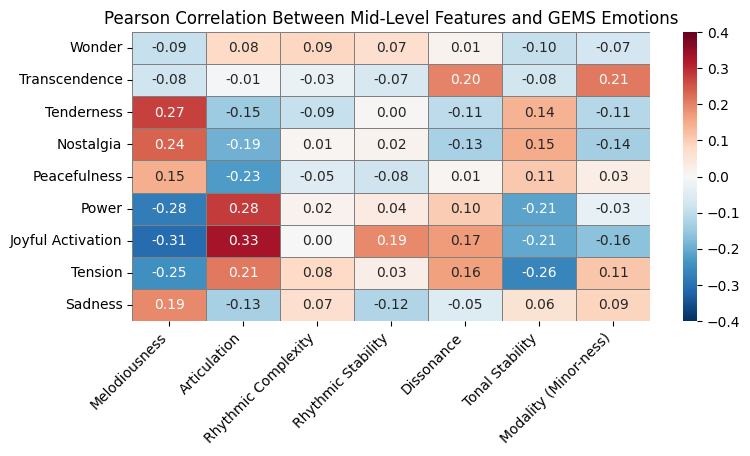

In [77]:
# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(
    correlation_matrix.T,
    annot=True,
    fmt=".2f",
    center=0,
    cmap="RdBu_r",      # a red–white–blue diverging map
    vmin=-0.4,          # force the lowest weight to map to the darkest blue
    vmax=+0.4,          # force the highest weight to map to the darkest red
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Pearson Correlation Between Mid-Level Features and GEMS Emotions")
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()


Top 5 variables on Factor1:
 Tonal Stability       0.267037
Melodiousness         0.199636
Articulation          0.191630
Dissonance            0.063774
Rhythmic Stability    0.060068
Name: Factor1, dtype: float64

Top 5 variables on Factor2:
 Tonal Stability          0.187019
Modality (Minor-ness)    0.136708
Dissonance               0.055050
Rhythmic Stability       0.032400
Articulation             0.031108
Name: Factor2, dtype: float64

Top 5 variables on Factor3:
 Tonal Stability          0.154772
Modality (Minor-ness)    0.089393
Rhythmic Stability       0.084830
Articulation             0.064399
Melodiousness            0.031023
Name: Factor3, dtype: float64


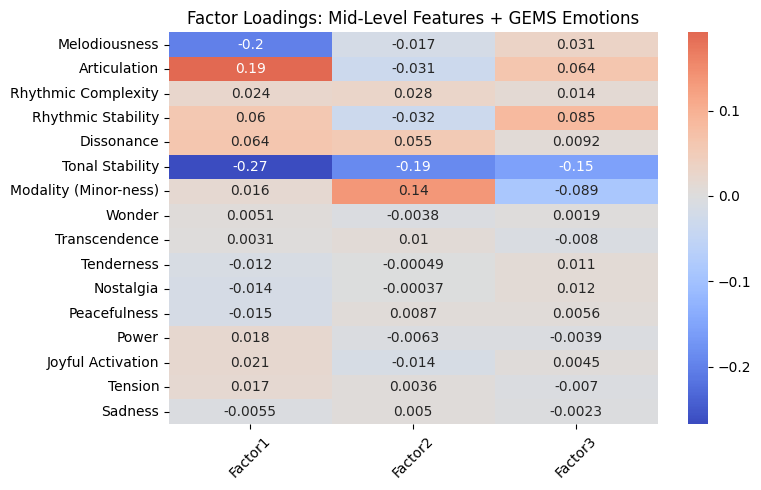

In [78]:
from sklearn.decomposition import FactorAnalysis
import pandas as pd

# Combine features and emotions
df_all = pd.concat([df_preds, df_labels], axis=1)

# Apply FA (you can tune n_components)
fa = FactorAnalysis(n_components=3, random_state=0)
factors = fa.fit_transform(df_all)

# Create loadings (how much each variable loads onto each factor)
loadings = pd.DataFrame(fa.components_.T, 
                        index=df_all.columns, 
                        columns=[f"Factor{i+1}" for i in range(fa.n_components)])
for factor in loadings.columns:
    top_vars = loadings[factor].abs().sort_values(ascending=False).head(5)
    print(f"\nTop 5 variables on {factor}:\n", top_vars)

# Optional: heatmap to visualize variable-factor relationships
plt.figure(figsize=(8, 5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings: Mid-Level Features + GEMS Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()